In [1]:
# !pip install pandas matplotlib

In [3]:
import pandas as pd

file_path = 'datasets/generated/global.csv'

df = pd.read_csv(file_path)

df.head(10)


,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower,description
0,1,Deaths,34,Azerbaijan,3,Both,158,<20 years,558,Mental disorders,1,Number,1990,0.007191,0.024988,0.001365,"A mental disorder, also referred to as a menta..."
1,1,Deaths,34,Azerbaijan,3,Both,284,20-54 years,558,Mental disorders,1,Number,1990,0.069156,0.122385,0.025847,"A mental disorder, also referred to as a menta..."
2,1,Deaths,34,Azerbaijan,3,Both,158,<20 years,1022,Other malignant neoplasms,1,Number,1990,47.084572,54.425768,39.557167,Cancer is a group of diseases involving abnorm...
3,1,Deaths,34,Azerbaijan,3,Both,228,55+ years,1022,Other malignant neoplasms,1,Number,1990,80.499834,92.702638,71.883535,Cancer is a group of diseases involving abnorm...
4,1,Deaths,34,Azerbaijan,3,Both,284,20-54 years,1022,Other malignant neoplasms,1,Number,1990,72.202348,81.172891,59.863048,Cancer is a group of diseases involving abnorm...
5,1,Deaths,34,Azerbaijan,3,Both,158,<20 years,1023,Other cardiovascular and circulatory diseases,1,Number,1990,7.818640,10.815159,5.903189,The blood circulatory system is a system of or...
6,1,Deaths,34,Azerbaijan,3,Both,228,55+ years,1023,Other cardiovascular and circulatory diseases,1,Number,1990,86.586268,107.699884,75.129026,The blood circulatory system is a system of or...
7,1,Deaths,34,Azerbaijan,3,Both,284,20-54 years,1023,Other cardiovascular and circulatory diseases,1,Number,1990,41.425081,47.881290,34.392474,The blood circulatory system is a system of or...
8,1,Deaths,34,Azerbaijan,3,Both,158,<20 years,653,Skin and subcutaneous diseases,1,Number,1990,1.024226,1.654302,0.670751,"Subcutaneous emphysema (SCE, SE) occurs when g..."
9,1,Deaths,34,Azerbaijan,3,Both,228,55+ years,653,Skin and subcutaneous diseases,1,Number,1990,4.925349,6.214641,3.471394,"Subcutaneous emphysema (SCE, SE) occurs when g..."


In [4]:
import matplotlib.pyplot as plt

In [5]:
portugal_mental_disorders = df[(df['location_name'] == 'Portugal') & (df['cause_name'] == 'Mental disorders')]

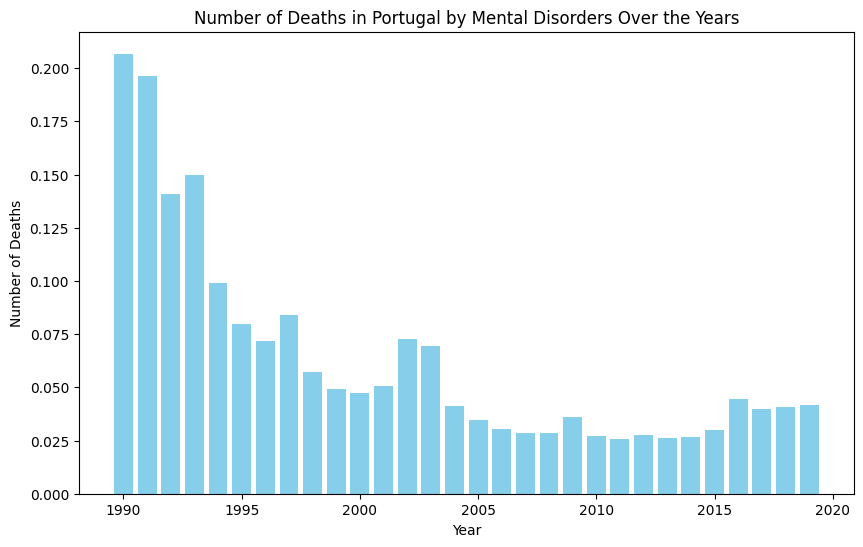

In [6]:
plt.figure(figsize=(10, 6))
plt.bar(portugal_mental_disorders['year'], portugal_mental_disorders['val'], color='skyblue')
plt.title('Number of Deaths in Portugal by Mental Disorders Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.show()

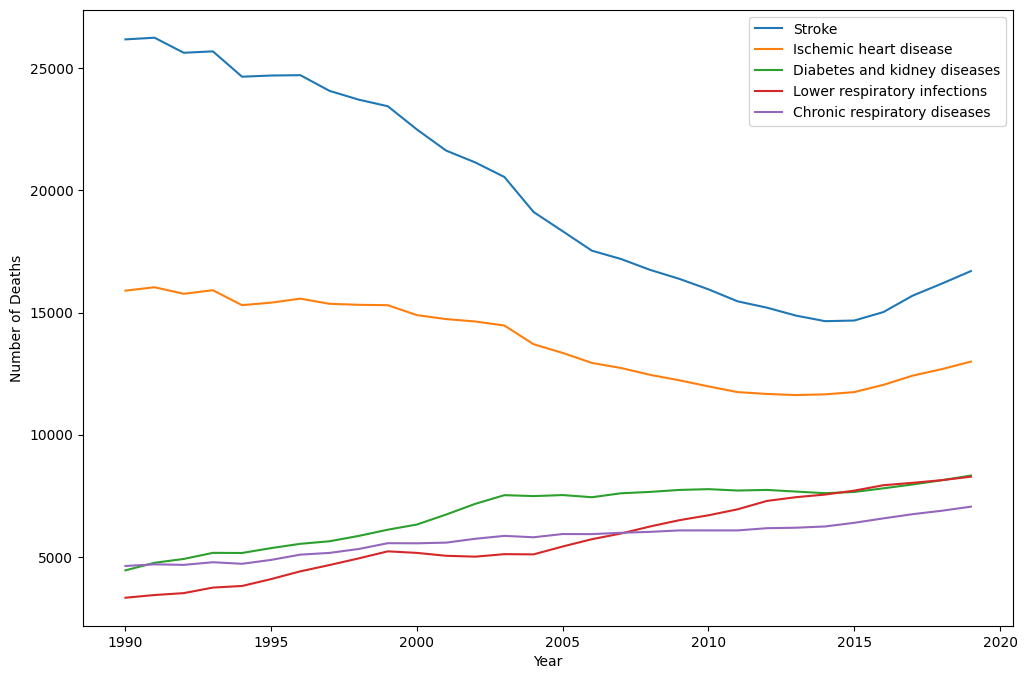

In [19]:
portugal_deaths_by_disease = df[df['location_name'] == 'Portugal'].groupby(['cause_name', 'year']).sum('val')

top_5_causes = portugal_deaths_by_disease.groupby('cause_name')['val'].sum().nlargest(5).index

top_5_data = portugal_deaths_by_disease.loc[top_5_causes]

plt.figure(figsize=(12, 8))
for cause in top_5_data.index.get_level_values('cause_name').unique():
    plt.plot(top_5_data.loc[cause]['val'], label=cause)

plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend()
plt.show()

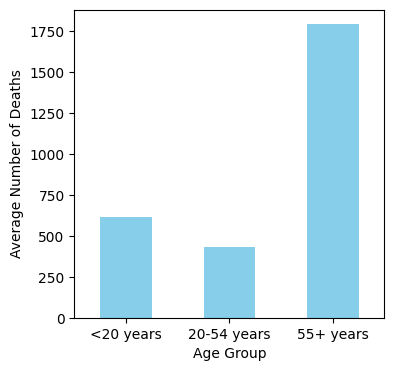

In [45]:
worldwide_avg_deaths_by_age = df.groupby('age_name')['val'].mean()

custom_sort_order = sorted(worldwide_avg_deaths_by_age.index, key=lambda x: (x[0] != '<', x))

worldwide_avg_deaths_by_age = worldwide_avg_deaths_by_age.loc[custom_sort_order]

plt.figure(figsize=(4, 4))
bar_chart = worldwide_avg_deaths_by_age.plot(kind='bar', color='skyblue')

plt.xticks(rotation=0)

plt.xlabel('Age Group')
plt.ylabel('Average Number of Deaths')

plt.show()

<Figure size 1200x800 with 0 Axes>

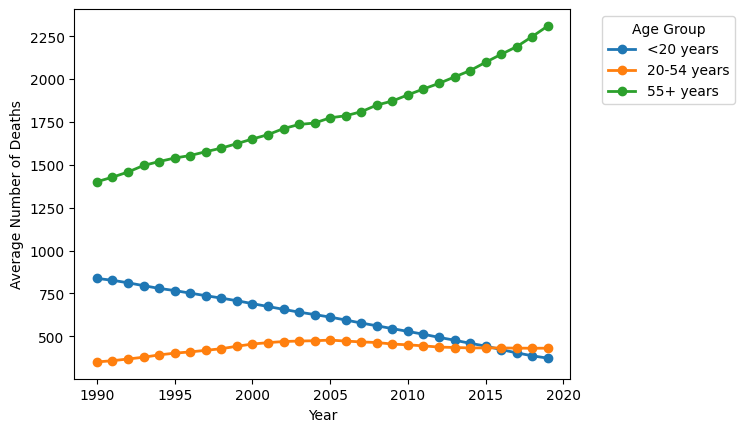

In [44]:
avg_deaths_by_year_age = df.groupby(['year', 'age_name'])['val'].mean().unstack()

custom_sort_order = sorted(avg_deaths_by_year_age.columns, key=lambda x: (x[0] != '<', x))

avg_deaths_by_year_age = avg_deaths_by_year_age[custom_sort_order]

plt.figure(figsize=(12, 8))
avg_deaths_by_year_age.plot(marker='o', linestyle='-', linewidth=2)

plt.xlabel('Year')
plt.ylabel('Average Number of Deaths')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

<Figure size 1200x800 with 0 Axes>

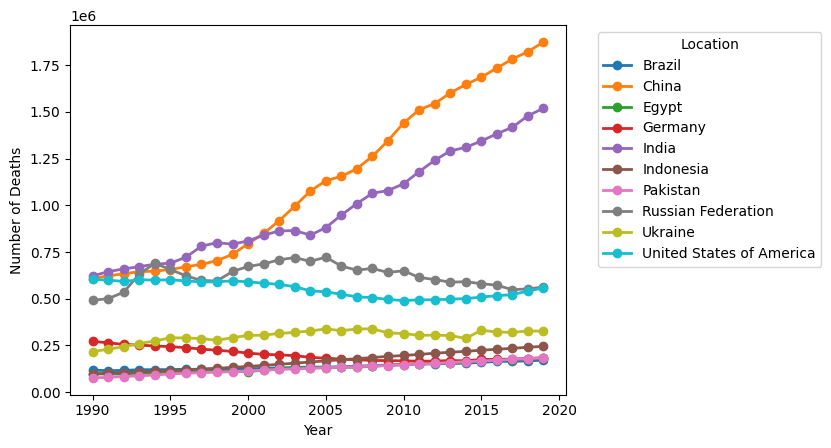

In [53]:
deadliest_disease = df.groupby('cause_name')['val'].mean().idxmax()

deadliest_disease_data = df[df['cause_name'] == deadliest_disease]

top_10_countries = deadliest_disease_data.groupby('location_name')['val'].sum().nlargest(10).index

top_10_countries_data = deadliest_disease_data[deadliest_disease_data['location_name'].isin(top_10_countries)]

total_deaths_by_year_location = top_10_countries_data.groupby(['year', 'location_name'])['val'].sum().unstack()

plt.figure(figsize=(12, 8))
total_deaths_by_year_location.plot(marker='o', linestyle='-', linewidth=2)

plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()